In [3]:
from __future__ import print_function
%matplotlib inline
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(42)

In [4]:
digits = load_digits()
X = digits.data
y = digits.target

In [5]:
X.shape

(1797, 64)

In [6]:
zeroes = [X[i] for i in range(len(y)) if y[i] == 0]
ones = [X[i] for i in range(len(y)) if y[i] == 1]
both = zeroes + ones
labels = [0] * len(zeroes) + [1] * len(ones)

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(both, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(both, labels, test_size = 0.3)
X_train

[array([  0.,   0.,   3.,  15.,  12.,   2.,   0.,   0.,   0.,   0.,   1.,
         16.,  16.,   6.,   0.,   0.,   0.,   0.,   4.,  16.,  16.,   2.,
          0.,   0.,   0.,   0.,   3.,  16.,  16.,   6.,   0.,   0.,   0.,
          0.,   4.,  16.,  16.,   0.,   0.,   0.,   0.,   0.,   1.,  15.,
         16.,   6.,   0.,   0.,   0.,   0.,   4.,  16.,  16.,   4.,   0.,
          0.,   0.,   0.,   4.,  16.,  16.,   6.,   0.,   0.]),
 array([  0.,   0.,   6.,  16.,  13.,  11.,   1.,   0.,   0.,   0.,  16.,
         15.,  12.,  16.,   1.,   0.,   0.,   3.,  16.,   7.,   0.,  13.,
          6.,   0.,   0.,   4.,  16.,   0.,   0.,  10.,   8.,   0.,   0.,
          8.,  16.,   0.,   0.,  14.,   6.,   0.,   0.,   5.,  16.,   7.,
          9.,  16.,   5.,   0.,   0.,   1.,  15.,  16.,  16.,  16.,   1.,
          0.,   0.,   0.,   6.,  16.,  14.,   6.,   0.,   0.]),
 array([  0.,   0.,   4.,  16.,  15.,   7.,   0.,   0.,   0.,   0.,   6.,
         16.,  16.,   6.,   0.,   0.,   0.,   0.,   5.,  1

In [9]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [10]:
clf.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1])

In [11]:
def print_proba_table(prob_list, stride=1):
    mnist_classes = [i for i in range(len(prob_list[0]))]
    print("Class:", *mnist_classes, sep="\t")
    print("index", *["---" for i in range(len(mnist_classes))], sep="\t")
    counter = 0
    for prob in prob_list[::stride]:
        print(counter*stride, *[round(prob[i], 3) for i in range(len(mnist_classes))], sep="\t")
        counter += 1
        
print_proba_table(clf.predict_proba(X_test), stride=4)

Class:	0	1
index	---	---
0	1.0	0.0
4	1.0	0.0
8	0.0	1.0
12	0.0	1.0
16	0.0	1.0
20	1.0	0.0
24	0.0	1.0
28	1.0	0.0
32	1.0	0.0
36	1.0	0.0
40	0.0	1.0
44	1.0	0.0
48	1.0	0.0
52	0.0	1.0
56	1.0	0.0
60	0.0	1.0
64	0.0	1.0
68	0.0	1.0
72	0.0	1.0
76	1.0	0.0
80	1.0	0.0
84	1.0	0.0
88	0.0	1.0
92	0.001	0.999
96	1.0	0.0
100	0.0	1.0
104	1.0	0.0


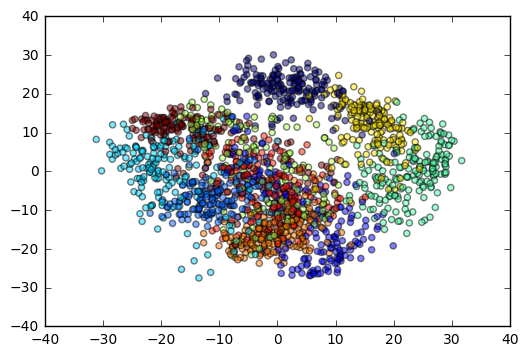

In [17]:
from sklearn.decomposition import PCA
pca = PCA(2)
Xproj = pca.fit_transform(X)
plt.scatter(Xproj.T[0], Xproj.T[1], c=y, alpha=0.5)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.97592592592592597

In [44]:
print_proba_table(clf.predict_proba(X_test), stride=10)

Class:	0	1	2	3	4	5	6	7	8	9
index	---	---	---	---	---	---	---	---	---	---
0	0.0	0.0	0.0	0.0	0.0	0.679	0.319	0.0	0.002	0.0
10	0.976	0.0	0.0	0.0	0.0	0.001	0.0	0.0	0.022	0.001
20	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0
30	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0
40	0.999	0.0	0.0	0.0	0.0	0.0	0.001	0.0	0.0	0.0
50	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0
60	0.0	0.0	0.0	0.0	0.0	0.707	0.0	0.0	0.0	0.293
70	0.0	0.0	0.0	0.664	0.0	0.335	0.0	0.0	0.0	0.0
80	0.0	0.0	0.001	0.0	0.0	0.0	0.0	0.0	0.0	0.998
90	0.0	0.0	0.0	0.0	0.0	0.0	0.783	0.0	0.217	0.0
100	0.0	0.0	0.0	0.989	0.0	0.0	0.0	0.0	0.011	0.0
110	0.0	0.0	0.0	0.0	0.854	0.0	0.146	0.0	0.0	0.0
120	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
130	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0
140	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0
150	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0
160	0.999	0.0	0.0	0.0	0.0	0.0	0.001	0.0	0.0	0.0
170	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
180	0.0	0.0	0.77	0.0	0.0	0.0	0.0	0.008	0.222	0.0
190	0.0	0.0	0.994	0.0	0.0	0.005	0.0	0.0	0.0	0.0
200

IndexError: list index out of range

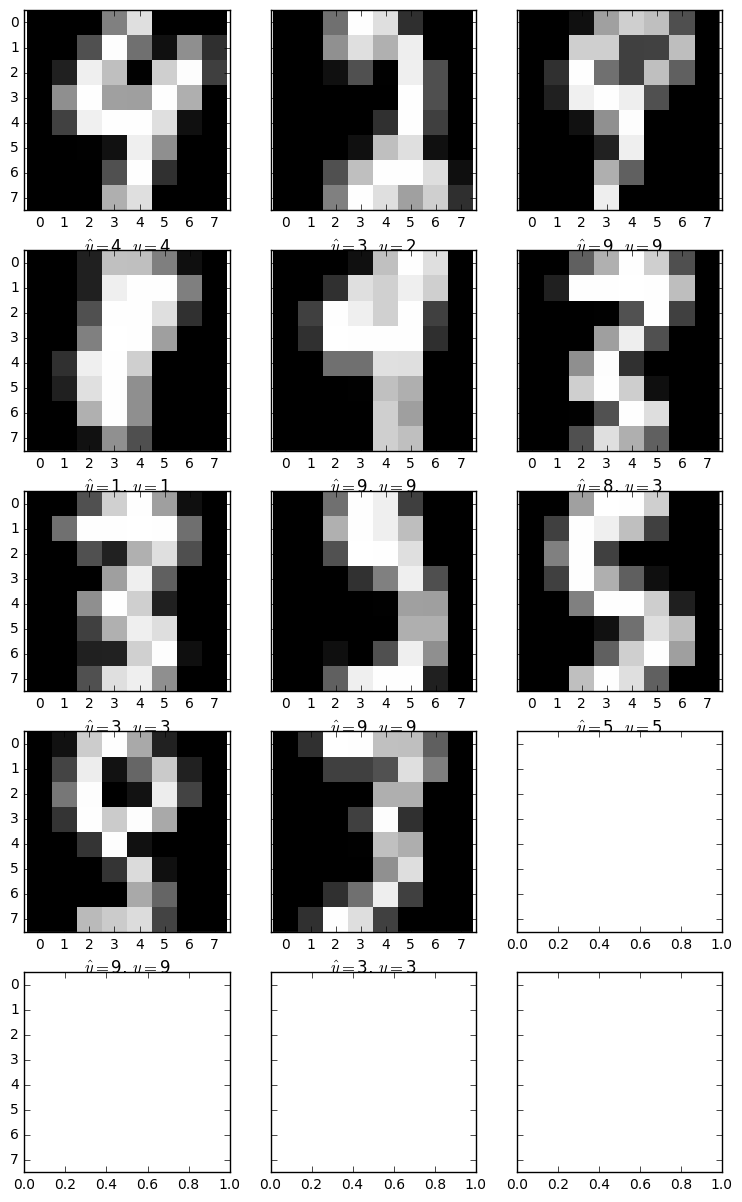

In [49]:
#
uncertain_indices = []
prob = clf.predict_proba(X_test)
for i in range(len(prob)):
    # number of classes with > 0.45 confidence
    contender_count = sum([1 if p > 0.45 else 0 for p in prob[i]])
    if contender_count == 2:
        uncertain_indices.append(i)
f, ax = plt.subplots(5, 3, sharex=False, sharey=True)
f.set_size_inches(9, 15)
predictions = clf.predict(X_test)
for i in range(5):
    for j in range(3):
        ax[i, j].set_xlabel(r"$\^y = $"+str(predictions[uncertain_indices[3*i + j]]) 
                        + r", $y = $"+str(y_test[uncertain_indices[3*i+j]]), size='large')
        ax[i, j].imshow(X_test[uncertain_indices[3*i + j]].reshape(8, 8), 
                        cmap='gray', interpolation='none')
f.tight_layout()